# AutoML

In [1]:
#pip install pycaret[full]

In [2]:
!pip install shap



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Trabalho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Leitura de Dataset 
Usaremos um dataset simples para demonstrar (você pode substituir pelo seu próprio dataset):

In [3]:
from pycaret.datasets import get_data
import pandas as pd 
# Carregar dataset
data = pd.read_csv('data/titanic_processed.csv')  # Exemplo de dados do Titanic
data = data[['Sex_bin', 'SibSp', 'Parch', 'Fare', 'Class_1', 'Class_2', 'Class_3', 'AgeCategory_bin', 'Survived']]

# Dados brutos
#data = get_data('titanic')


## Configurar o Experimento
A configuração do experimento é o coração do PyCaret. Aqui você define o target e as features:

In [4]:
from pycaret.classification import *

# Configuração inicial
clf = setup(data=data, target='Survived', session_id=123)

# Visualização inicial
print(clf)


,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(889, 9)"
4,Transformed data shape,"(889, 9)"
5,Transformed train set shape,"(622, 9)"
6,Transformed test set shape,"(267, 9)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


# Treinar e Comparar Modelos
PyCaret compara diferentes modelos automaticamente e mostra o melhor.

In [5]:
# Comparar e obter o melhor modelo
best_model = compare_models(include = ['lr', 'rf', 'lightgbm', 'catboost'])
print("Melhor modelo:", best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8328,0.8571,0.7312,0.8152,0.7680,0.6383,0.6435,0.0740
catboost,CatBoost Classifier,0.8216,0.8569,0.6723,0.8311,0.7409,0.6076,0.6174,0.4870
rf,Random Forest Classifier,0.8006,0.8397,0.7062,0.7611,0.7299,0.5725,0.5761,0.3740
lr,Logistic Regression,0.7877,0.8511,0.6471,0.7666,0.6985,0.5370,0.5441,0.6300


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

Melhor modelo: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


## Ajustar o Melhor Modelo
Refine o melhor modelo encontrado automaticamente.

In [6]:
# Ajustar o modelo
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8168,0.7083,0.8500,0.7727,0.6523,0.6587
1,0.7937,0.8050,0.6667,0.7619,0.7111,0.5517,0.5547
2,0.8548,0.8919,0.6957,0.8889,0.7805,0.6744,0.6858
3,0.8710,0.9008,0.7391,0.8947,0.8095,0.7133,0.7207
4,0.7742,0.8268,0.5833,0.7778,0.6667,0.5011,0.5130
5,0.7097,0.7626,0.5000,0.6667,0.5714,0.3586,0.3671
6,0.8710,0.9117,0.7083,0.9444,0.8095,0.7149,0.7319
7,0.7581,0.8503,0.7083,0.6800,0.6939,0.4940,0.4943
8,0.8387,0.9139,0.7917,0.7917,0.7917,0.6601,0.6601


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Finalizar e Fazer Previsões
Finalize o modelo e faça previsões nos dados de teste.

In [7]:
# Finalizar o modelo
final_model = finalize_model(tuned_model)

In [8]:
# Fazer previsões
predictions = predict_model(final_model)
predictions

## Prediction Label
# Para problemas binários, o prediction_score indica a probabilidade associada à classe positiva. Por exemplo:
# Se o modelo prever 1, o prediction_score mostrará a probabilidade de que a amostra pertence à classe 1.
# Se o modelo prever 0, o valor será a probabilidade de que a amostra pertence à classe 0.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8876,0.9578,0.8137,0.8830,0.8469,0.7584,0.7600


,Sex_bin,SibSp,Parch,Fare,Class_1,Class_2,Class_3,AgeCategory_bin,Survived,prediction_label,prediction_score
853,1,0,1,9.350000,False,False,True,1,1,1,0.5848
177,0,0,0,13.000000,False,True,False,1,0,0,0.8673
119,0,2,0,73.500000,False,True,False,1,0,0,0.9566
698,0,0,0,7.650000,False,False,True,1,0,0,0.9921
737,0,0,0,7.895800,False,False,True,1,0,0,0.9751
...,...,...,...,...,...,...,...,...,...,...,...
429,0,0,0,26.549999,True,False,False,1,1,1,0.5280
310,1,2,2,262.375000,True,False,False,1,1,1,0.8679
651,0,0,0,8.433300,False,False,True,1,0,0,0.9355
541,1,4,2,31.275000,False,False,True,0,0,0,0.8911


## Salvar e Reutilizar o Modelo
Salve o modelo treinado para uso futuro.

In [9]:
# Salvar o modelo
save_model(final_model, 'melhor_modelo_pycaret')

# Carregar o modelo salvo
loaded_model = load_model('melhor_modelo_pycaret')


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


# Explicabilidade

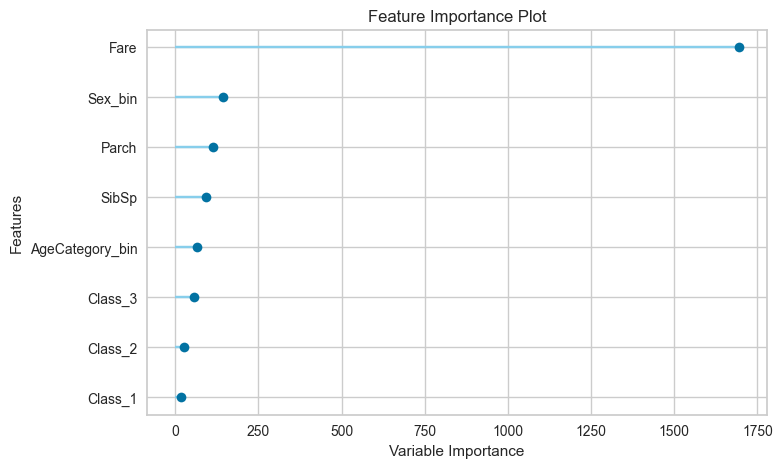

In [10]:
# Feature Importance -  Importância das features
plot_model(best_model, plot='feature')  # Gráfico de importância das variáveis

In [ ]:
# Remova o comentário da celula abaixo caso

In [19]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [20]:
#pip install --upgrade shap

Interpretação do Gráfico
**Eixo Y (Features):** <br>
Cada linha representa uma feature do modelo, como Sex_bin, Fare, Class_3, etc.
As features são classificadas por ordem de importância (de cima para baixo).
<br> <br>
**Eixo X (SHAP Value):**<br>
O valor SHAP mostra o impacto de cada variável na predição.
Valores positivos (à direita) indicam que a feature aumenta a probabilidade da classe prevista.
Valores negativos (à esquerda) indicam que a feature reduz a probabilidade da classe prevista.
<br> <br>
**Cores (Feature Value):** <br> 
As cores representam os valores das features:
Azul: Valores baixos da feature.
Rosa/vermelho: Valores altos da feature.
<br> <br>
**Pontos:** <br>
Cada ponto representa uma observação no dataset.
A dispersão horizontal mostra como a importância da feature varia entre as observações.

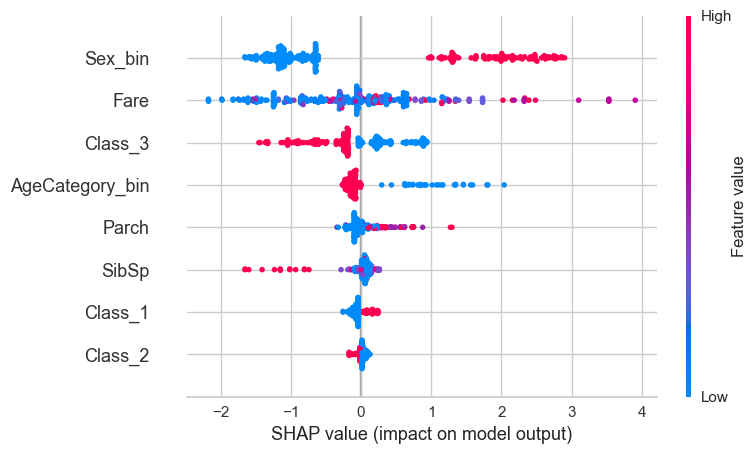

In [18]:
import shap

# # Criação do gráfico SHAP
interpret_model(best_model, plot='summary')  # Sumário SHAP integrado no PyCaret


**Sex_bin:**<br>
A variável Sex_bin (0 para masculino e 1 para feminino) é a mais impactante.
Valores altos (vermelhos) aumentam a probabilidade da classe positiva (sobrevivência).
<br><br>
**Fare:**<br>
Valores altos da tarifa (Fare) também aumentam a probabilidade de sobrevivência, enquanto valores baixos a reduzem.
<br><br>
**Class_3:**<br>
Pertencer à terceira classe tem um impacto negativo na sobrevivência (valores vermelhos estão à esquerda).
<br><br>
**AgeCategory_bin:**<br>
A idade binarizada parece ter um impacto menor comparado às variáveis acima.
<br><br>

# PandasGUI

In [ ]:
pip install pandasgui

In [ ]:
import pandas as pd
from pandasgui import show

# Carregar seu DataFrame
df = pd.read_csv('data/titanic.csv')

# Iniciar a interface do PandasGUI
show(df)
